---
title: "Regression"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-06"
categories: [python, datacamp, regression, machine learning, supervised ]
image: "regression.jpg"

---

# Regression

With the help of a dataset on advertising expenditures, you will learn about regression and develop models to predict sales values. In addition to learning linear regression mechanics, you will be introduced to common performance metrics like R-squared and root mean squared error. In order to reduce the risk of overfitting, you will perform cross-validation k-fold and apply regularization to regression models.

This **Regression** is part of [Datacamp course: Supervised Learning with scikit-learn](https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn)

This is my learning experience of data science through DataCamp

**Data import for supervised learning**

The data from Gapminder has been consolidated into a single CSV file called 'gapminder.csv' in the workspace. Based on features such as a country's GDP, fertility rate, and population, you will use this data to predict life expectancy in that country. The dataset has been preprocessed as in Chapter 1.

The target variable here is quantitative, so this is a regression problem. First, you will fit a linear regression with one feature: 'fertility', which is the average number of children a woman gives birth to in a given country. Regression models will be built using all the features in later exercises.

First, you must import the data and prepare it for scikit-learn. Feature and target variable arrays must be created. Additionally, since you will only use one feature to begin with, you'll need to reshape it using NumPy's .reshape() method.

In [10]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = y.reshape(-1,1)
X_reshaped = X.reshape(-1,1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


<AxesSubplot:>

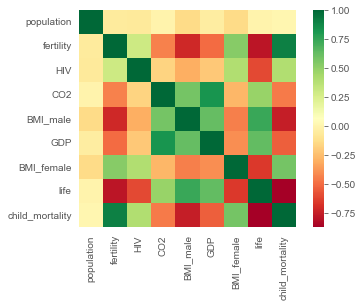

In [12]:
sns.heatmap(df.corr(),square=True,cmap='RdYlGn')

![](linearRegression.png)

**Fit & predict for regression**

Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the
score using scikit-learn's .score() method.

0.6192442167740035


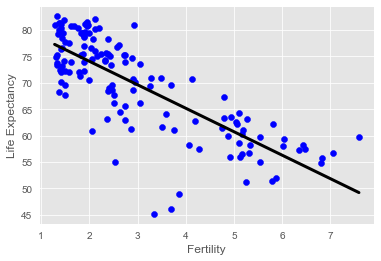

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#This need to be imported because its is cleaned and processed data
df=pd.read_csv("gapminder-clean.csv")

y=df['life'].values
X=df.drop('life',axis=1)

#reshape to 1-D
y=y.reshape(-1,1)
X_fertility=X['fertility'].values.reshape(-1,1)

_ = plt.scatter(X['fertility'],y,color='blue')
_=plt.ylabel('Life Expectancy')
_=plt.xlabel('Fertility')

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regression
reg=LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility),max(X_fertility)).reshape(-1,1)

# Fit model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# print R^2
print(reg.score(X_fertility,y))

# plot regression line
plt.plot(prediction_space,y_pred, color='black',linewidth=3)
plt.show()

 Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!

**Regression training/testing split**

Your supervised learning model must be able to generalize well to new data, as you learned in Chapter 1. In both classification and linear regression models, this is true.

You will divide the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. You will also compute the Root Mean Squared Error (RMSE) when evaluating regression models in addition to the R2R2score.

In [14]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731429362
Root Mean Squared Error: 3.24760108003772


Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it? You'll learn about this as well how to better validate your models in the below code flow

**5-fold cross-validation**

In order to evaluate a model, cross-validation is essential. A maximum amount of data is used to train the model, since the model is not only trained, but also tested on all available data during training.

Using Gapminder data, we will practice 5-fold cross validation. The cross_val_score() function in scikit-learn uses

 In regression, this is the metric of choice. As we are performing 5-fold cross-validation, the function will return 5 scores. The average of these five scores is what we need to do.

In [15]:
# Import the necessary modules
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793401


**K-Fold CV comparison**

Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

%timeit cross_val_score(reg, X, y, cv = ____)


In [16]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

0.8718712782622058
0.8436128620131151


**Regularization I: Lasso**

In this study, we examine how Lasso selected RM as the most important feature for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. When dealing with data involving thousands of features, its ability to perform feature selection in this manner becomes even more useful.

We will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Similarly to Boston data, you will find that some coefficients are shrunk to 0, leaving only the most significant ones.

According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

**Regularization II: Ridge**

You should use Ridge regression when building regression models rather than Lasso when selecting features.

LASSO performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. Also known as

 The regularization term is the regularization term

The coefficients' norm. However, this is not the only way to regularize.

Alternatively, you could take the squared values of the coefficients multiplied by some alpha - like Ridge regression - and compute

 As a rule. As part of this exercise, you will fit ridge regression models with a range of different alphas, and plot cross-validated scores for each using this function, which plots the score and standard error for each alpha:

In [17]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a prepro

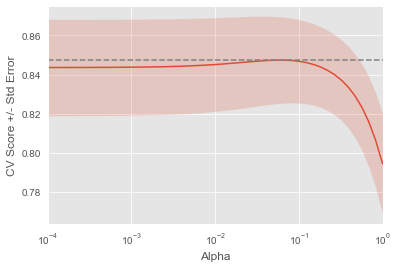

In [18]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha

    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)

    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))

    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? You'll learn all about this in the next section